# TAREA 1

In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
path = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)
X, y = df.iloc[:, :-1], df.iloc[:, -1]

### Árbol de Decisiones (Hiperparámetro max_depth = 3)

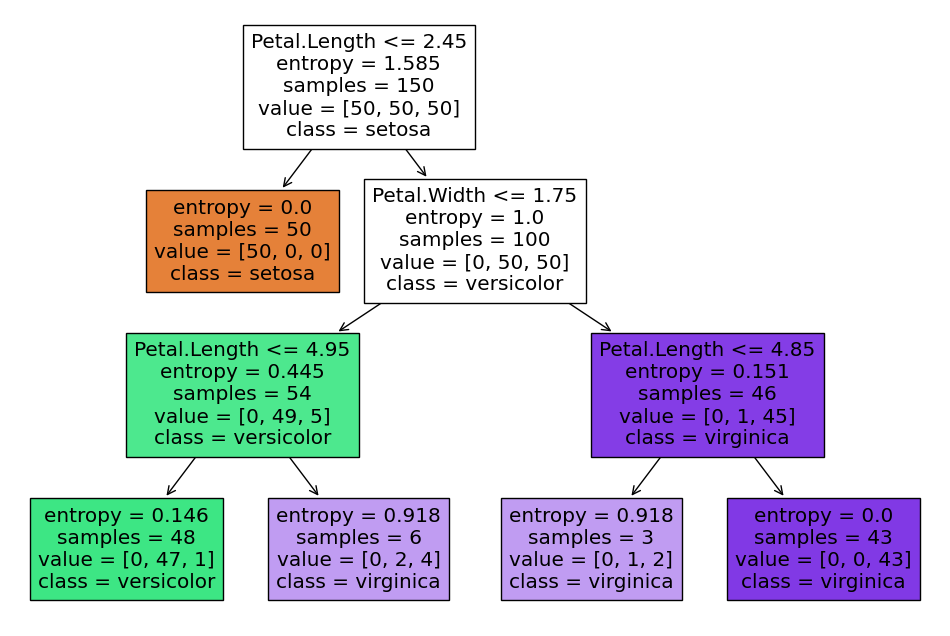

In [40]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 99) # max depth nos limita el no. de ramificaciones
clf.fit(X, y)

plt.figure(figsize = (12, 8))
plot_tree(clf, filled=True, feature_names = df.columns[:-1], class_names = df["Species"].unique())
plt.show() # a la izquierda es true (viéndolo de frente XD)

### Matriz de Confusión - Árbol Podado

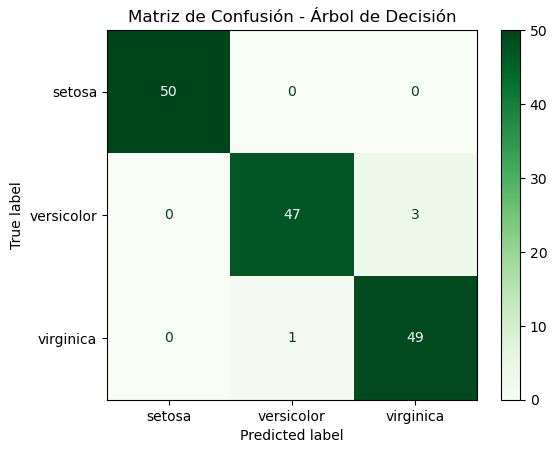

In [42]:
y_pred = clf.predict(X)
matriz_confusion = confusion_matrix(y, y_pred)

# Visualizar la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = df["Species"].unique())
disp.plot(cmap = "Greens") 
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

### Matriz de Confusión - Árbol sin podar XD

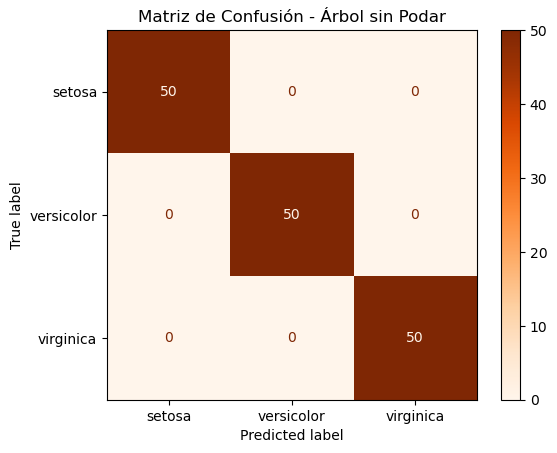

In [54]:
clf2 = DecisionTreeClassifier(criterion = "entropy", random_state = 99) 
clf2.fit(X, y)

y_pred = clf2.predict(X) 

matriz_confusion = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=df["Species"].unique())
disp.plot(cmap="Oranges")  
plt.title("Matriz de Confusión - Árbol sin Podar")
plt.show()

Como podemos observar a través de esta segunda matríz, el no podar el modelo nos conlleva a un sobreajuste, por lo que su rendimiento es practicamente del %100, lo cual no es lo más óptimo, ya que en vez de aprender a generalizar está "memorizando" los datos.